# Different techniques to deal with Missing Numerical Values

## 1. Mean/Median/Mode Imputation :

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("titanic.csv",usecols = ['Age','Fare','Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [5]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [6]:
def impute_nan(df,variable,median):
    df[variable + "_median"] = df[variable].fillna(median)

In [7]:
median = df.Age.median()
median

28.0

In [10]:
impute_nan(df,"Age",median)
df.head(10)

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
5,0,NaN,8.4583,28.0
6,0,54.0,51.8625,54.0
7,0,2.0,21.0750,2.0
8,1,27.0,11.1333,27.0
9,1,14.0,30.0708,14.0


## 2. Random Sample Imputation

In [32]:
df = pd.read_csv("titanic.csv",usecols = ['Age','Fare','Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [33]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [34]:
def impute_nan(df,variable,median):
    df[variable + "_median"] = df[variable].fillna(median)
    df[variable + "_random"] = df[variable]
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state = 0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable + "_random"] = random_sample

In [35]:
median = df.Age.median()
median

28.0

In [37]:
impute_nan(df,"Age",median)
df.head(20)

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.00
1,1,38.0,71.2833,38.0,38.00
2,1,26.0,7.9250,26.0,26.00
3,1,35.0,53.1000,35.0,35.00
4,0,35.0,8.0500,35.0,35.00
5,0,NaN,8.4583,28.0,28.00
6,0,54.0,51.8625,54.0,54.00
7,0,2.0,21.0750,2.0,2.00
8,1,27.0,11.1333,27.0,27.00
9,1,14.0,30.0708,14.0,14.00


C:\Users\tom97\anaconda3\lib\site-packages\seaborn\distributions.py:949: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout = self.ax.fill_between([], [], **plot_kws)
C:\Users\tom97\anaconda3\lib\site-packages\seaborn\distributions.py:992: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  artist = ax.fill_between(
C:\Users\tom97\anaconda3\lib\site-packages\seaborn\distributions.py:949: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout = self.ax.fill_between([], [], **plot_kws)
C:\Users\tom97\anaconda3\lib\site-packages\seaborn\distributions.py:992: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  artist = ax.fill_between(
C:\Users\tom97

<AxesSubplot:xlabel='Age', ylabel='Density'>

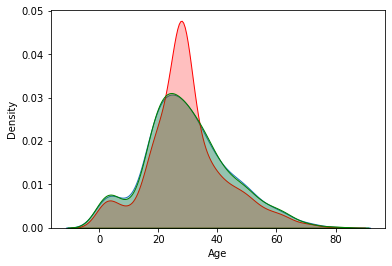

In [39]:
sns.kdeplot(df['Age'],shade = True, Label = 'Age')
sns.kdeplot(df['Age_median'],shade = True,color = 'r', Label = 'Age_median')
sns.kdeplot(df['Age_random'],shade = True,color = 'g', Label = 'Age_random')